<a href="https://colab.research.google.com/github/Crosshairs532/404_not_found/blob/main/career_switch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1. Data description
  This Dataset contains the information of the 5000 people. The information consists of where they live, how developed the cities are. Along with that it contains the information of the people's education desciplines,their working places ,salaries, work experince etc.

  ### 1.a Columns Description
   - `enrollee_id`: This is the unique identifier of a person.
   - `city`: This represents the city code, which is a unique identifier of a city.
   - `city_development_index`: This is value that indicated how developed a city is.
   
   - `gender`: Gender of a person.
   - `relevent_experience`: Relevant experience of a person ( Yes/No).
   - `enrolled_university`: Enrollment type in a university (part time / full time). If any
   - `education_level`: Eduction Level type ('Graduate', 'Masters', 'High School', 'Phd', 'Primary School). if any
   - `major_discipline`: Major of a candidate had on their education level.
   - `experience`: Years of a experience of a candidate.(if any)
   - `company_size`: How big the company is based on the members.
   - `company_type`: Type of the company.
   - `last_new_job`: How many years have passed till the current Job.
   - `training_hours`: Training hours completed.
   - `will_change_career`: Whether the candidate will switch the career or not. This comes in (`Yes`/`1`) or (`No`/`0`)


  ### 1.b Columns Type
   - Numerical: `city_development_index`, `experience`, `company size`, `last_new_job`, `training_hours`, `will_change_career`.
   - categorical: `gender`, `relevent_experience`, `enrolled_university`, `major_descipline`, `education_level`, `company_type`.
   - Mixed:`city`.   
   

| Column                   | Issue                        | Quality                                               |
|--------------------------|------------------------------|-------------------------------------------------------|
| `City`                   | `No issue`                   | `Okay`                                                |
| `city_development_index` | `No issue`                   | `Okay`                                                |
| `gender`                 | `null values`                | `completeness`                                        |
| `relevent_experience`    | `Long Sentence`              | `Accuracy`                                            |
| `enrolled_university`    | `null values`,               | `completeness`, `inconsistent`                        |
| `education_level`        | `null values`                | `completeness`                                        |
| `major_discipline`       | `null values`                | `completeness`                                        |
| `experience`             | `null values`, `Corruopt data` | `completeness`, `inconsistent`, `invalid`, `inaccurate` |
| `company_size`           | `null values`, `Corrupted`   | `completeness`, `inconsistent`, `invalid`, `inaccurate` |
| `company_type`           | `null values` | `completeness`                         |
| `last_new_job`           | `null values` , `Corrupt data` | `completeness`, `inconsistent`, `invalid`             |
| `training_hours`         | `Okay`                       | `Okay`                                                |
|`will_change_career`                          | `Okay`                       | `Okay`                                                |


## Feature Engineering
    - Handle missing values - DONE
    - Feature Scaling- DONE
    - Encoding - DONE
    - Outlier detection - DONE
  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
career_df  = pd.read_csv("/content/Career_Switch_Prediction_Dataset.csv")
career_df.shape
df = career_df.copy()
df.isnull().sum()

NameError: name 'pd' is not defined

# EDA

   - categorical: `gender`, `relevent_experience`, `enrolled_university`, `major_descipline`, `education_level`, `company_type`.

<Axes: title={'center': 'Number of Class'}>

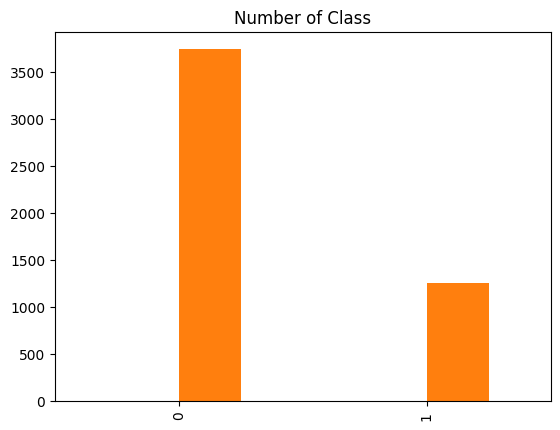

In [ ]:
# number of classes

# # sns.barplot(data=df, x="will_change_career", y=df.groupby("will_change_career")["will_change_career"].sum())
pd.DataFrame(df.groupby("will_change_career")["will_change_career"].value_counts()).reset_index().plot(kind="bar", legend=False, title="Number of Class")

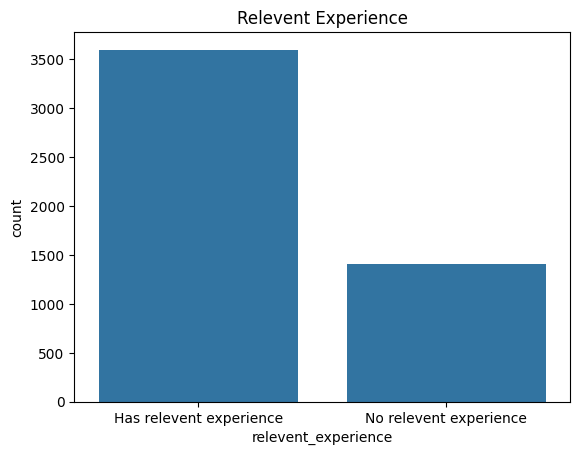

In [ ]:
# relevent_experience
plt.title("Relevent Experience")
sns.countplot(data=df, x=df["relevent_experience"])
plt.show()

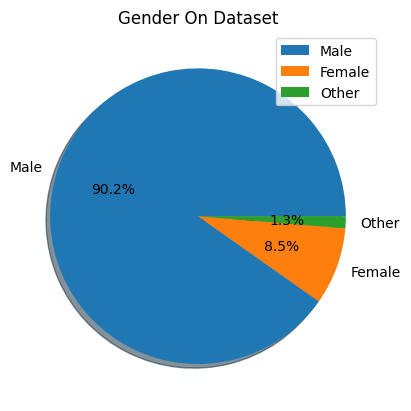

In [ ]:
# gender

plt.title("Gender On Dataset")
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().reset_index()["gender"], autopct='%1.1f%%', shadow=True)
plt.legend(loc="best")
plt.show()


<Axes: title={'center': 'University Enrollment with Gender'}, xlabel='enrolled_university', ylabel='count'>

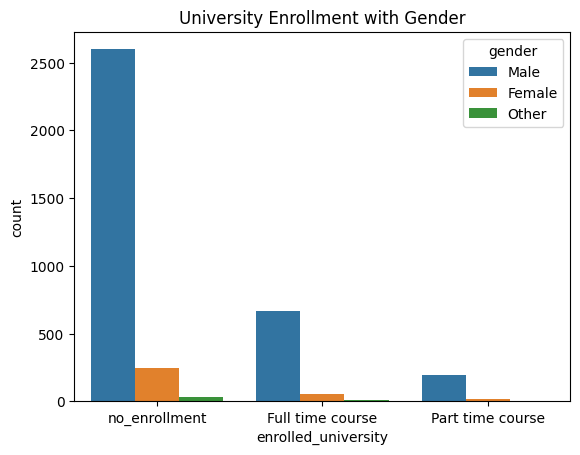

In [ ]:
# enrolled_university

df["enrolled_university"]
plt.title("University Enrollment with Gender")
sns.countplot(data=df, x=df["enrolled_university"], hue="gender", fill=True)


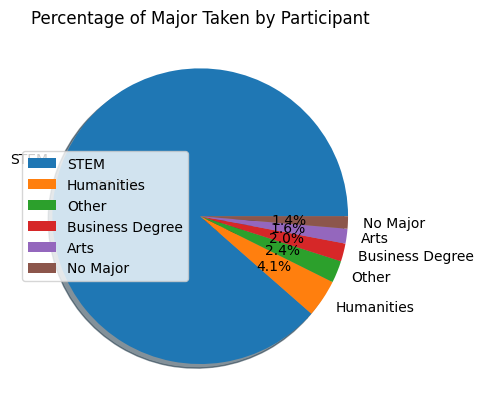

In [ ]:
# major descipline
plt.title("Percentage of Major Taken by Participant")
plt.pie(df['major_discipline'].value_counts(), labels=df['major_discipline'].value_counts().reset_index()["major_discipline"], autopct='%1.1f%%', shadow=True)
plt.legend(loc="best")
plt.show()

<Axes: title={'center': 'Education Level'}, xlabel='education_level', ylabel='percent'>

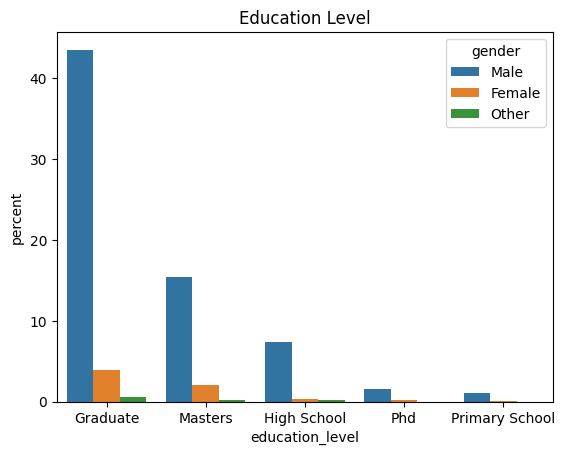

In [ ]:
# Which type of education level is highest
plt.title("Education Level")
sns.countplot(data=df, x="education_level", stat="percent", hue="gender", fill=True)


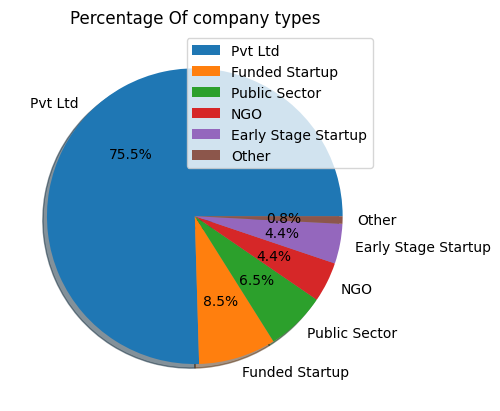

In [ ]:
# compnay type
plt.title("Percentage Of company types")
plt.pie(data=df, x=df["company_type"].value_counts(), labels=df["company_type"].value_counts().reset_index()["company_type"], autopct='%1.1f%%', shadow=True)

plt.legend(loc="best")
plt.show()




<Axes: title={'center': 'Relation of Major discipline with University Enrollment'}, xlabel='major_discipline', ylabel='count'>

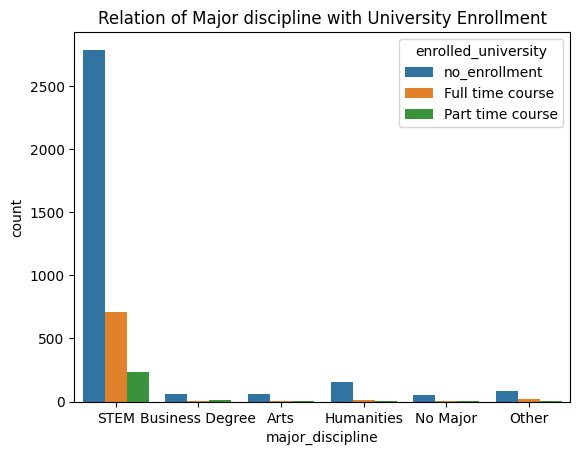

In [ ]:
# major discpline , enrolled_univerisy
plt.title("Relation of Major discipline with University Enrollment")
sns.countplot(data=df, x=df["major_discipline"], fill=True, hue="enrolled_university")

   - Numerical: `city_development_index`, `experience`, `company size`, `last_new_job`, `training_hours`, `will_change_career`.


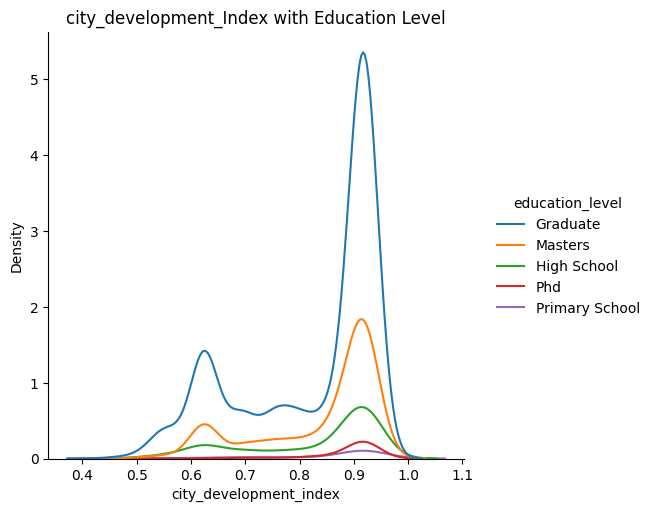

In [ ]:
# plt.title()
sns.displot(data=df,x="city_development_index", kind="kde", hue="education_level").set(
    title="city_development_Index with Education Level")
plt.show()
# sns.displot(data=df,x="city_development_index", kind="kde", hue="enrolled_university")
# sns.displot(data=df,x="city_development_index", kind="kde", hue="major_discipline")

<Axes: xlabel='city_development_index', ylabel='Density'>

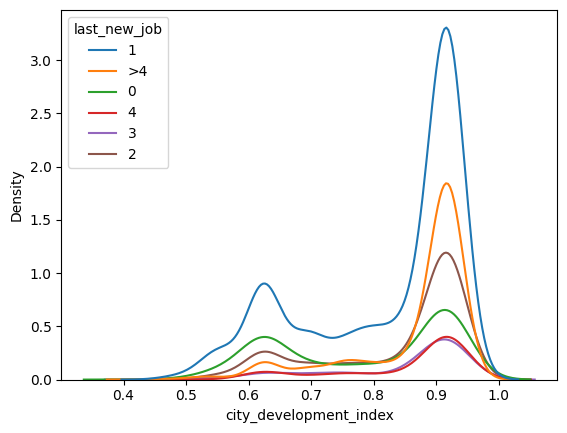

In [ ]:
# city_development_index - last_New_job


# sns.scatterplot(data=df, y="last_new_job", x="experience")
sns.kdeplot(data=df, x="city_development_index", hue="last_new_job",)

<Axes: xlabel='will_change_career', ylabel='training_hours'>

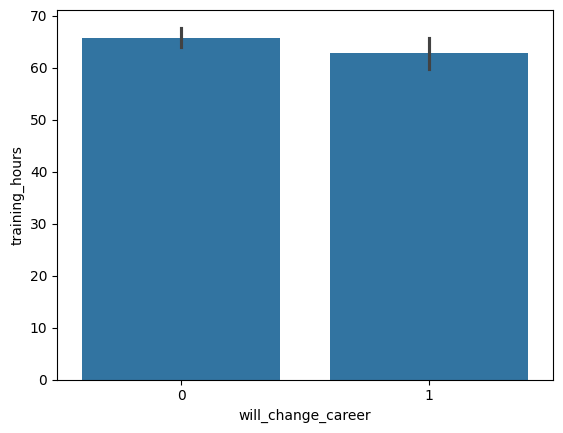

In [ ]:
# city_development_index - training_hours
# city_development_index - experience
sns.barplot(data=df, x="will_change_career", y= "training_hours")


# Feature Engineering

#### (a) Handling Mixed Data / Inconsistent Data

In [ ]:
# city
df["city"] = df["city"].str.split("_", expand=True)[1]
df["city"] = df["city"].astype("int")

In [ ]:
#  relevant_experience
df["relevent_experience"].groupby(df["relevent_experience"]).count()

,relevent_experience
relevent_experience,
Has relevent experience,3598
No relevent experience,1402


In [ ]:
df["relevent_experience"] = np.where(df["relevent_experience"] == 'Has relevent experience', 1, 0)
df["relevent_experience"].groupby(df["relevent_experience"]).count()

,relevent_experience
relevent_experience,
0,1402
1,3598


In [ ]:
# enrolled_university
from sklearn.impute import SimpleImputer
imp_mode  = SimpleImputer(strategy='most_frequent')
df["enrolled_university"] = imp_mode.fit_transform(df[["enrolled_university"]]).ravel()

In [ ]:
# experience
df["experience"].isnull().sum()
def Experience(val):
    if(val  ==  "<1"):
        return "0"
    if(val  ==  ">20"):
        return "21"
    else:
        return val
df["experience"] = df["experience"].apply(Experience)


In [ ]:
# Company_size

def CompanySize(val):
    if(val == "10000+"):
        return "10000-20000"
    elif(val== "Oct-49"):
        return "10-49"
    elif(val == "<10"):
        return "1-9"
    else:
        return val
df["company_size"] = df["company_size"].apply(CompanySize)

In [ ]:
df["company_size_min"] = df["company_size"].str.split("-", expand=True)[0]
df["company_size_max"] = df["company_size"].str.split("-", expand=True)[1]

In [ ]:
df.drop("company_size", axis=1, inplace=True)

In [ ]:
# last new job
def last_new_job(val):
    if(val == ">4"):
        return "5"
    else:
        return val
df["last_new_job"] = df["last_new_job"].apply(last_new_job)

## b) Handle Missing Categorical  Value

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

smp = SimpleImputer(strategy="most_frequent")
col = ["gender", "education_level", "enrolled_university", "company_type", "major_discipline"]
ct = ColumnTransformer([
    ("gender", smp, ["gender"]),
    ("edu", smp, ["education_level"]),
    ("enrolled_uni", smp, ["enrolled_university"]),
    ("company_type", smp, ["company_type"]),
    ("major", smp, ["major_discipline"]),
], remainder="passthrough")

transformed  = ct.fit_transform(df)

In [ ]:
columns  = col + [ i for  i in df.columns if i not in col]
df_t = pd.DataFrame(transformed, columns=columns)

In [ ]:
df_t["company_size_min"].fillna("0",inplace=True)

<ipython-input-234-9bcc953ea670>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_t["company_size_min"].fillna("0",inplace=True)


In [ ]:
df_t["company_size_max"].fillna("0",inplace=True )

<ipython-input-235-de4ed1ebb738>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_t["company_size_max"].fillna("0",inplace=True )


## b) Handle Numerical Missing Data

In [ ]:
df_t["last_new_job"] = df_t["last_new_job"].astype("float64")

In [ ]:
df_t["last_new_job_mode"] = df_t["last_new_job"].fillna(df_t["last_new_job"].mode()[0])
df_t["last_new_job_mean"] = df_t["last_new_job"].fillna(df_t["last_new_job"].mean())

np.float64(1.0)

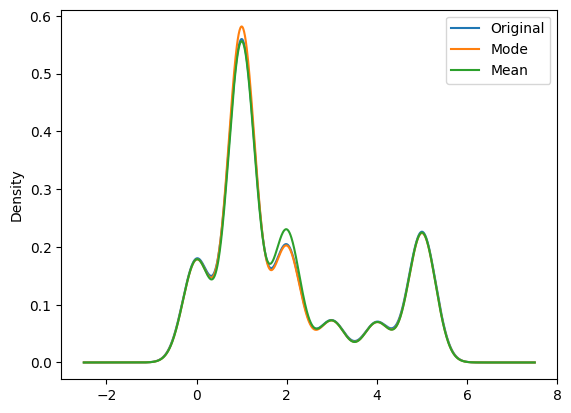

In [ ]:
df_t["last_new_job"].plot(kind="kde", label="Original", legend=True)
df_t["last_new_job_mode"].plot(kind="kde", label="Mode", legend=True)#keeps the orginal distribution clean
df_t["last_new_job_mean"].plot(kind="kde", label="Mean", legend=True)
df_t["last_new_job"].mode()[0]

In [ ]:
df_t.drop(["last_new_job_mode", "last_new_job_mean"], axis=1, inplace=True)
# df_t["last_new_job"].fillna(df_t["last_new_job"].mode()[0])
df_t[df_t["last_new_job"].isnull()]["last_new_job"]
df_t["last_new_job"].fillna(df_t["last_new_job"].mode()[0], inplace=True)

<ipython-input-239-526f09a61446>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_t["last_new_job"].fillna(df_t["last_new_job"].mode()[0], inplace=True)


In [ ]:
df_t.isnull().sum()
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  5000 non-null   object 
 1   education_level         5000 non-null   object 
 2   enrolled_university     5000 non-null   object 
 3   company_type            5000 non-null   object 
 4   major_discipline        5000 non-null   object 
 5   enrollee_id             5000 non-null   object 
 6   city                    5000 non-null   object 
 7   city_development_index  5000 non-null   object 
 8   relevent_experience     5000 non-null   object 
 9   experience              4989 non-null   object 
 10  last_new_job            5000 non-null   float64
 11  training_hours          5000 non-null   object 
 12  will_change_career      5000 non-null   object 
 13  company_size_min        5000 non-null   object 
 14  company_size_max        5000 non-null   

In [ ]:
df_t["experience"].sample(20)

,experience
1989,5
160,17
4071,9
1085,11
1853,8
1281,21
648,14
2492,2
3708,19
877,16


In [ ]:
df_t["experience"] = df_t["experience"].astype("Int64")

In [ ]:
df_t["experience"] = df_t["experience"].fillna(df_t["experience"].median())

In [ ]:
df_t.isnull().sum()

,0
gender,0
education_level,0
enrolled_university,0
company_type,0
major_discipline,0
enrollee_id,0
city,0
city_development_index,0
relevent_experience,0
experience,0


In [ ]:
df_t["experience"].isnull().sum()
df_t["company_size_max"].isnull().sum()
df_t["will_change_career"].isnull().sum()
df_t["training_hours"].isnull().sum()


np.int64(0)

# Change Data type

In [ ]:
df_t["city_development_index"] = df_t["city_development_index"].astype("float64")
df_t["relevent_experience"] = df_t["relevent_experience"].astype("int")
df_t["training_hours"] = df_t["training_hours"].astype("int")
df_t["will_change_career"] = df_t["will_change_career"].astype("int")
df_t[["company_size_min", "company_size_max"]] = df_t[["company_size_min", "company_size_max"]].astype("int")
df_t["city"] = df_t["city"].astype("int")

In [ ]:
# df_t.drop("enrollee_id", axis=1, inplace=True)
df_t.set_index("enrollee_id", inplace=True)

,city,city_development_index,relevent_experience,experience,last_new_job,training_hours,will_change_career,company_size_min,company_size_max
city,1.000000,0.410759,-0.016015,0.154554,0.094246,0.007868,-0.138307,-0.014816,-0.013044
city_development_index,0.410759,1.000000,0.075128,0.332477,0.186799,0.004717,-0.346808,0.053598,0.062021
relevent_experience,-0.016015,0.075128,1.000000,0.350391,0.265971,0.020138,-0.112887,0.080329,0.090956
experience,0.154554,0.332477,0.350391,1.000000,0.466925,-0.004631,-0.178259,0.065660,0.077892
last_new_job,0.094246,0.186799,0.265971,0.466925,1.000000,0.005942,-0.055095,0.085165,0.099233
training_hours,0.007868,0.004717,0.020138,-0.004631,0.005942,1.000000,-0.022170,-0.006141,-0.007488
will_change_career,-0.138307,-0.346808,-0.112887,-0.178259,-0.055095,-0.022170,1.000000,-0.073260,-0.082873
company_size_min,-0.014816,0.053598,0.080329,0.065660,0.085165,-0.006141,-0.073260,1.000000,0.992429
company_size_max,-0.013044,0.062021,0.090956,0.077892,0.099233,-0.007488,-0.082873,0.992429,1.000000


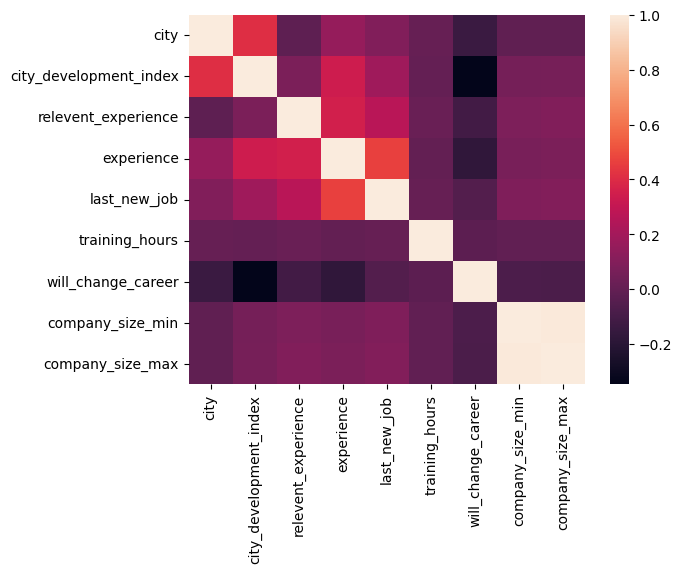

In [ ]:
numeric_df = df_t.select_dtypes(include=["Int64", "int64", "float64"])

sns.heatmap(numeric_df.corr())
numeric_df.corr()

In [ ]:
df_t.sort_values(by="enrollee_id")

,gender,education_level,enrolled_university,company_type,major_discipline,city,city_development_index,relevent_experience,experience,last_new_job,training_hours,will_change_career,company_size_min,company_size_max
enrollee_id,,,,,,,,,,,,,,
7,Male,Masters,Full time course,Pvt Ltd,STEM,136,0.897,1,13,1.0,18,0,0,0
8,Female,Graduate,no_enrollment,Funded Startup,Humanities,103,0.920,0,13,2.0,12,0,100,500
11,Male,Primary School,Part time course,Pvt Ltd,STEM,103,0.920,1,11,4.0,20,0,0,0
18,Male,Graduate,no_enrollment,Pvt Ltd,STEM,23,0.899,0,21,5.0,24,0,10,49
21,Male,Graduate,Full time course,Pvt Ltd,STEM,73,0.754,1,8,2.0,90,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33370,Male,High School,Full time course,Pvt Ltd,STEM,114,0.926,0,6,1.0,264,0,0,0
33374,Male,Graduate,no_enrollment,Pvt Ltd,STEM,61,0.913,1,10,2.0,3,0,0,0
33377,Male,Graduate,no_enrollment,Pvt Ltd,Other,65,0.802,1,10,2.0,27,0,100,500


In [ ]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 8949 to 2386
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  5000 non-null   object 
 1   education_level         5000 non-null   object 
 2   enrolled_university     5000 non-null   object 
 3   company_type            5000 non-null   object 
 4   major_discipline        5000 non-null   object 
 5   city                    5000 non-null   int64  
 6   city_development_index  5000 non-null   float64
 7   relevent_experience     5000 non-null   int64  
 8   experience              5000 non-null   Int64  
 9   last_new_job            5000 non-null   float64
 10  training_hours          5000 non-null   int64  
 11  will_change_career      5000 non-null   int64  
 12  company_size_min        5000 non-null   int64  
 13  company_size_max        5000 non-null   int64  
dtypes: Int64(1), float64(2), int64(6), object(

# Till Now Done
- Handled Mixed Data
- handled Missing Values
- Handle Data Type

# Outier Detection

Numerical
- ['city_development_index',
 'relevent_experience',
 'experience',
 'last_new_job',
 'training_hours',
 'will_change_career',
 'company_size_min',
 'company_size_max', 'city']

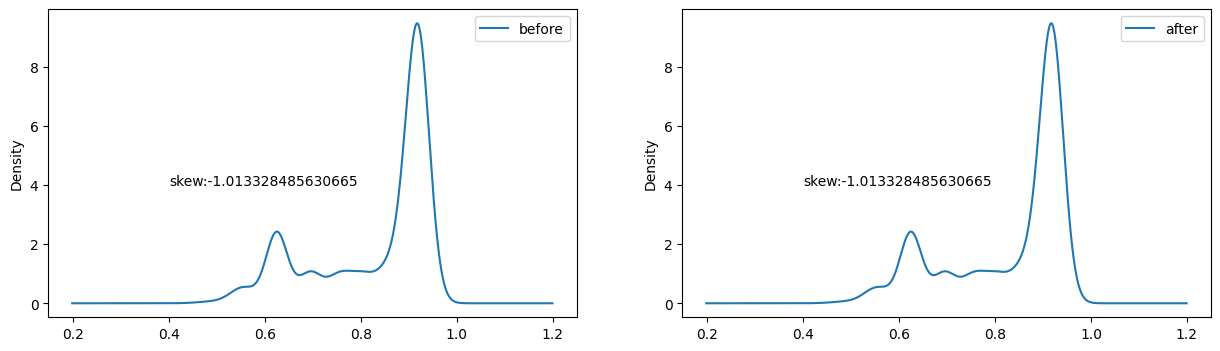

In [ ]:
plt.figure(figsize=(15, 4))
# sns.boxplot(df_t["city_development_index"])
df_t["city_development_index"].skew()
plt.subplot(121)
df_t["city_development_index"].plot(kind="kde", label="before", legend=True)
plt.text(.4, 4, f"skew:{df_t['city_development_index'].skew()}")


percentile25 = df_t['company_size_min'].quantile(0.25)
percentile75 = df_t['company_size_min'].quantile(0.75)
iqr = percentile75 - percentile25
upper = percentile75 + 1.5 * iqr
lower= percentile25 - 1.5 * iqr

# outliers
df_t[(df_t["city_development_index"] > upper)  | (df_t["city_development_index"] <  lower)]

#capping
df_t["city_development_index_after"] = np.where(df_t["city_development_index"] > upper, upper, np.where(df_t["city_development_index"]<lower, lower,df_t["city_development_index"]))
df_t["city_development_index"] = np.where(df_t["city_development_index"] > upper, upper, np.where(df_t["city_development_index"]<lower, lower,df_t["city_development_index"]))

plt.subplot(122)
df_t["city_development_index_after"].plot(kind="kde", label="after", legend=True)
plt.text(.4, 4, f"skew:{df_t['city_development_index_after'].skew()}")

df_t.drop("city_development_index_after", axis=1, inplace=True)


In [ ]:
# relevant experience - No Outliers

# sns.boxplot(x=df_t["relevent_experience"])
# df_t["relevent_experience"].plot(kind="box")
# plt.show()

#using IQR
percentile25 = df['relevent_experience'].quantile(0.25)
percentile75 = df['relevent_experience'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr


df_t[(df_t["relevent_experience"] > upper_limit) | (df_t["relevent_experience"]< lower_limit)]

,gender,education_level,enrolled_university,company_type,major_discipline,city,city_development_index,relevent_experience,experience,last_new_job,training_hours,will_change_career,company_size_min,company_size_max
enrollee_id,,,,,,,,,,,,,,


<Axes: >

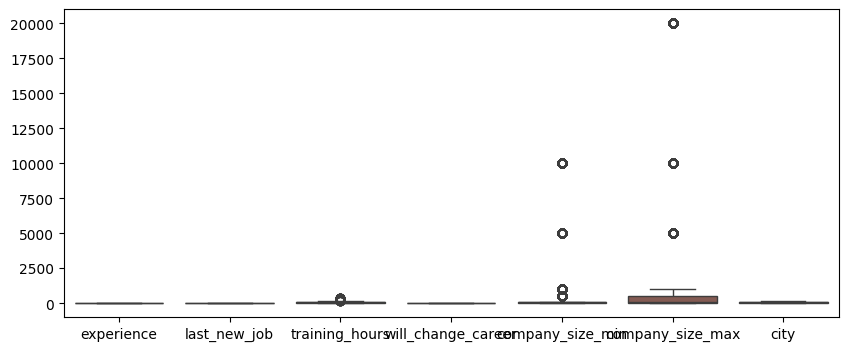

In [ ]:
# experience
plt.figure(figsize=(10,4))
sns.boxplot(df_t[["experience", 'last_new_job', 'training_hours', 'will_change_career', 'company_size_min', 'company_size_max', 'city']
])


In [ ]:
#training_hours

#using IQR
percentile25 = df['training_hours'].quantile(0.25)
percentile75 = df['training_hours'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr


df_t[(df_t["training_hours"] > upper_limit) | (df_t["training_hours"]< lower_limit)]

# capping
df_t["training_hours"] = np.where(df_t["training_hours"] > upper, upper, np.where(df_t["training_hours"]<lower, lower,df_t["training_hours"]))


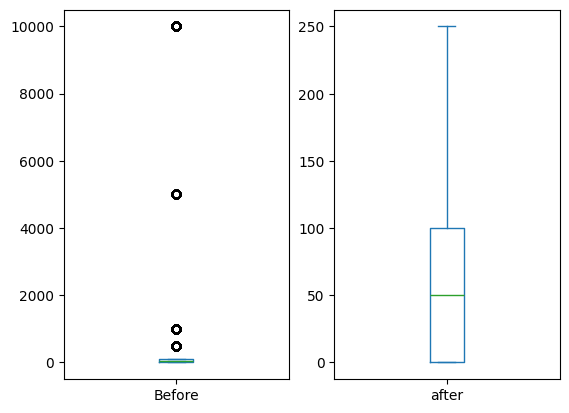

In [ ]:
#company_size_min

#using IQR
percentile25 = df_t['company_size_min'].quantile(0.25)
percentile75 = df_t['company_size_min'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr


df_t[(df_t["company_size_min"] > upper_limit) | (df_t["company_size_min"]< lower_limit)]
df_t["company_size_min_after"] = np.where(df_t["company_size_min"] > upper_limit, upper_limit, np.where(df_t["company_size_min"]<lower_limit, lower_limit,df_t["company_size_min"]))
plt.subplot(121)
df_t["company_size_min"].plot(kind="box", label="Before", legend=True)
plt.subplot(122)
df_t["company_size_min_after"].plot(kind="box", label="after", legend=True)
df_t["company_size_min"] = np.where(df_t["company_size_min"] > upper_limit, upper_limit, np.where(df_t["company_size_min"]<lower_limit, lower_limit,df_t["company_size_min"]))

df_t.drop(["company_size_min_after"], axis=1,inplace=True)
# df_t.info()

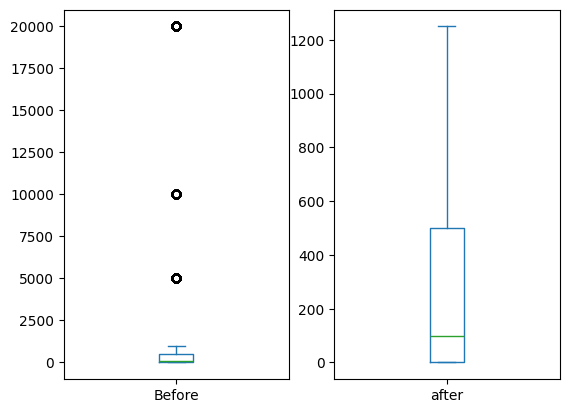

In [ ]:
#company_size_max

#using IQR
percentile25 = df_t['company_size_max'].quantile(0.25)
percentile75 = df_t['company_size_max'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr


df_t[(df_t["company_size_max"] > upper_limit) | (df_t["company_size_max"]< lower_limit)]
df_t["company_size_max_after"] = np.where(df_t["company_size_max"] > upper_limit, upper_limit, np.where(df_t["company_size_max"]<lower_limit, lower_limit,df_t["company_size_max"]))
plt.subplot(121)
df_t["company_size_max"].plot(kind="box", label="Before", legend=True)
plt.subplot(122)
df_t["company_size_max_after"].plot(kind="box", label="after", legend=True)
df_t["company_size_max"] = np.where(df_t["company_size_max"] > upper_limit, upper_limit, np.where(df_t["company_size_max"]<lower_limit, lower_limit,df_t["company_size_max"]))

df_t.drop("company_size_max_after", axis=1,inplace=True)
df_t.drop("company_size_min", axis=1, inplace=True)
# df_t.info()

In [ ]:
df_t.columns

Index(['gender', 'education_level', 'enrolled_university', 'company_type',
       'major_discipline', 'city', 'city_development_index',
       'relevent_experience', 'experience', 'last_new_job', 'training_hours',
       'will_change_career', 'company_size_max'],
      dtype='object')

# Train Test Split

In [ ]:
X = df_t.loc[: , df_t.drop('will_change_career', axis = 1).columns]
y = df_t.loc[:, "will_change_career"]
X

,gender,education_level,enrolled_university,company_type,major_discipline,city,city_development_index,relevent_experience,experience,last_new_job,training_hours,company_size_max
enrollee_id,,,,,,,,,,,,
8949,Male,Graduate,no_enrollment,Pvt Ltd,STEM,103,0.920,1,21,1.0,36.0,0.0
29725,Male,Graduate,no_enrollment,Pvt Ltd,STEM,40,0.776,0,15,5.0,47.0,99.0
11561,Male,Graduate,Full time course,Pvt Ltd,STEM,21,0.624,0,5,0.0,83.0,0.0
33241,Male,Graduate,no_enrollment,Pvt Ltd,Business Degree,115,0.789,0,0,0.0,52.0,0.0
666,Male,Masters,no_enrollment,Funded Startup,STEM,162,0.767,1,21,4.0,8.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7892,Female,Graduate,no_enrollment,Pvt Ltd,STEM,21,0.624,1,3,1.0,114.0,500.0
19768,Male,Graduate,no_enrollment,Pvt Ltd,STEM,21,0.624,0,3,1.0,64.0,500.0
33180,Male,High School,no_enrollment,Pvt Ltd,STEM,16,0.910,0,21,5.0,89.0,1250.0


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42,stratify=y)




In [ ]:
X_train.shape, X_test.shape

((3500, 12), (1500, 12))

In [ ]:
y_train.reset_index().groupby("will_change_career").count()

,enrollee_id
will_change_career,
0,2617
1,883


# Function Transform

In [ ]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
import scipy.stats as stats

power = PowerTransformer(standardize=False)
fn = FunctionTransformer(np.log1p)


new_df = X_train[['city_development_index', 'experience', 'last_new_job', 'training_hours', 'company_size_max']]
new_df_x_test = X_test[['city_development_index', 'experience', 'last_new_job', 'training_hours', 'company_size_max']]
# ct = ColumnTransformer([
#     ("fn",fn, new_df.columns)
# ], remainder="passthrough")

ct1 = ColumnTransformer([
    ("box-cox", power, new_df.columns)
], remainder="passthrough")

# X_trainsformed_numerical_fn = ct.fit_transform(new_df)
# X_train_transformed_numerical_fn = pd.DataFrame(X_trainsformed_numerical_fn, columns=new_df.columns)


X_transformed = ct1.fit_transform(new_df)
Xtest_transformed = ct1.transform(new_df_x_test)
X_train_transformed = pd.DataFrame(X_transformed, columns=new_df.columns, index=new_df.index)
X_test_transformed = pd.DataFrame(Xtest_transformed, columns=new_df_x_test.columns, index=new_df_x_test.index)
for col in new_df.columns:
    print(f"{col} =  before: {new_df[col].skew()} box: {X_train_transformed[col].skew()}")

    # plt.figure(figsize=(14,4))
    # plt.subplot(121)
    # # sns.distplot(new_df[col])
    # # stats.probplot(new_df[col], dist="norm", plot=plt)
    # # plt.text(1,2, f"skew : {new_df[col].skew()}")
    # plt.title(f"{col}-Before")

    # plt.subplot(122)
    # # stats.probplot(X_train_transformed_numerical[col], dist="norm", plot=plt)
    # # plt.text(1,2, f"skew : {X_train_transformed_numerical[col].skew()}")
    # plt.title(f"{col}-After")

    # plt.show()




city_development_index =  before: -1.0353501474711135 box: -0.5792874986182102
experience =  before: 0.4165313094919067 box: -0.09889323805550915
last_new_job =  before: 0.8346600491325726 box: 0.009627442565212927
training_hours =  before: 1.4778125359437642 box: -0.027643819582040215
company_size_max =  before: 0.9232196425719639 box: -0.11274353944111436


In [ ]:
# pd.concat([X_train[[i for i in X_train.columns if i not in X_train_transformed.columns]], X_train_transformed ], axis=1)

new_df_1 =  X_train[[i for i in X_train.columns if i not in X_train_transformed.columns]].sort_index()
new_df_2 = X_test[[i for i in X_test.columns if i not in X_test_transformed.columns]].sort_index()
X_train_after_transform = pd.concat([new_df_1, X_train_transformed], axis=1)
X_test_after_transform = pd.concat([new_df_2, X_test_transformed], axis=1)


# Feature Encoding

Target
 - will_change_career - Not needed


Categorical
- [gender',
 'education_level',
 'enrolled_university',
 'company_type',
 'major_discipline',
]

Numerical
- ['city_development_index',
 'relevent_experience',
 'experience',
 'last_new_job',
 'training_hours',
 'will_change_career',
 'company_size_min',
 'company_size_max']

In [ ]:
[i for i in df_t.columns if df_t[i].dtype == 'O' ]
df_t.select_dtypes(include=['number']).columns.tolist()


['city',
 'city_development_index',
 'relevent_experience',
 'experience',
 'last_new_job',
 'training_hours',
 'will_change_career',
 'company_size_max']

## Encoding

* Gender - One Hot Encoding
*  education_level - Ordinal Encoding
*  enrolled_university - One Hot Encoding
*  company_type - One Hot Encoding
*  major_discipline - One Hot Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

lb = LabelEncoder()
oe = OrdinalEncoder(categories=[["Primary School", 'High School', 'Graduate', "Masters", "Phd"]])
ohe = OneHotEncoder(sparse_output=False, drop="first")

ct = ColumnTransformer(
    [
    ("one_hot_encoding", ohe, ["gender", "enrolled_university", "company_type", "major_discipline"]),
    ("education_level_ordinal_encoding",oe, ["education_level"]),
    ],
    remainder="passthrough"
    )

x_train_encoded = ct.fit_transform(X_train_after_transform)
x_test_encoded = ct.transform(X_test_after_transform)

ohe_feature_names = ct.named_transformers_['one_hot_encoding'].get_feature_names_out(["gender", "enrolled_university", "company_type", "major_discipline"])
oe_feature_names = ct.named_transformers_['education_level_ordinal_encoding'].get_feature_names_out(["education_level"])
feature_names =  list(ohe_feature_names) + list(oe_feature_names)




In [ ]:
X_train_after_transform.columns

Index(['gender', 'education_level', 'enrolled_university', 'company_type',
       'major_discipline', 'city', 'relevent_experience',
       'city_development_index', 'experience', 'last_new_job',
       'training_hours', 'company_size_max'],
      dtype='object')

In [ ]:

transformed_columns = ["gender", "enrolled_university", "company_type", "major_discipline", "education_level"]

remainder_columns = [col for col in X_train_after_transform.columns if col not in transformed_columns]

In [ ]:
x_train_encoded.shape, x_test_encoded.shape
ohe_feature_names

array(['gender_Male', 'gender_Other',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'company_type_Funded Startup',
       'company_type_NGO', 'company_type_Other',
       'company_type_Public Sector', 'company_type_Pvt Ltd',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM'], dtype=object)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

x_train_scaled = mm.fit_transform(x_train_encoded)
x_test_scaled= mm.transform(x_test_encoded)


# Till Now
- Handle Missing Data
- handle Mixed Data
- Handle Data type
- EDA
- Outlier Detection
- Function Transfromation(power)
- Encoding
- scaling



In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

model = RandomForestClassifier()
model.fit(x_train_scaled, y_train)

importances = model.feature_importances_
final_columns = feature_names + remainder_columns
feature_importance_df = pd.DataFrame({
    'Feature': final_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [ ]:
len(importances)

22

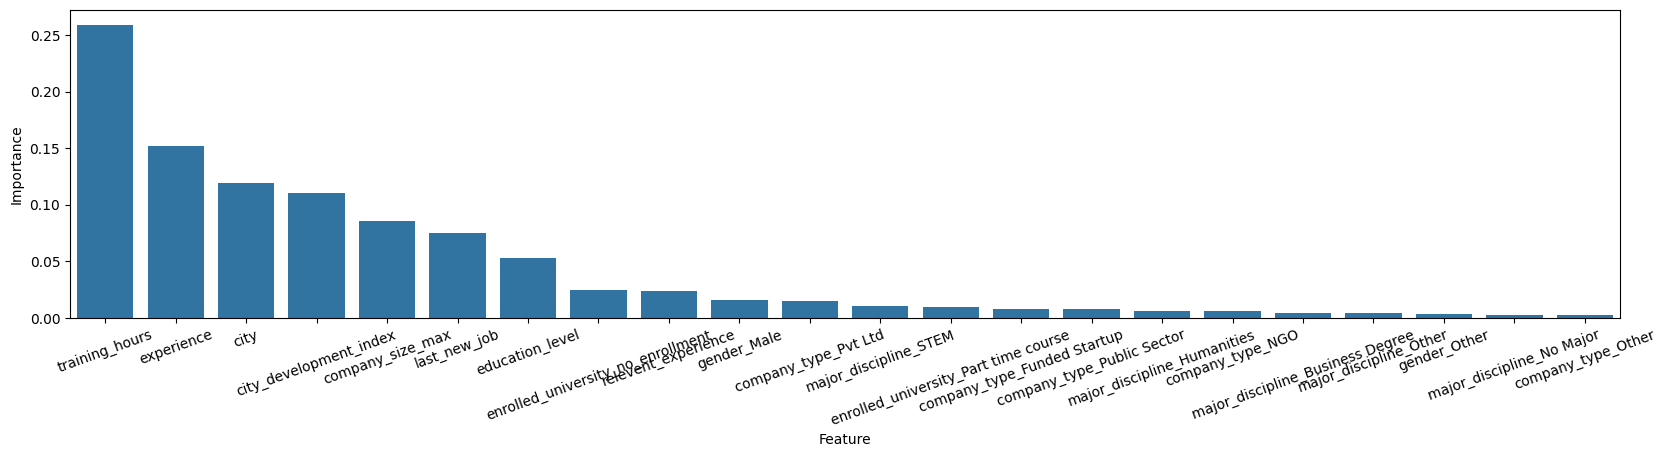

In [ ]:
plt.figure(figsize=(20, 4))
sns.barplot(x=feature_importance_df["Feature"], y=feature_importance_df["Importance"])
plt.xticks(rotation=20)
plt.show()

Best params for LogisticRegression(): {'class_weight': None, 'solver': 'lbfgs'}
Logistic regression : 
AUC score: 0.47031838798283665
[[1121    0]
 [ 379    0]]
Precsion Score: 0.0
Recall Score: 0.0
 

Best params for GaussianNB(): {}
GaussianNB : 
AUC score: 0.4756919354421114
[[1014  107]
 [ 347   32]]
Precsion Score: 0.2302158273381295
Recall Score: 0.08443271767810026
 



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best params for DecisionTreeClassifier(): {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree : 
AUC score: 0.5033987746522964
[[810 311]
 [272 107]]
Precsion Score: 0.25598086124401914
Recall Score: 0.28232189973614774
 

Best params for KNeighborsClassifier(): {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Knn : 
AUC score: 0.4600561598083128
[[996 125]
 [355  24]]
Precsion Score: 0.1610738255033557
Recall Score: 0.0633245382585752
 



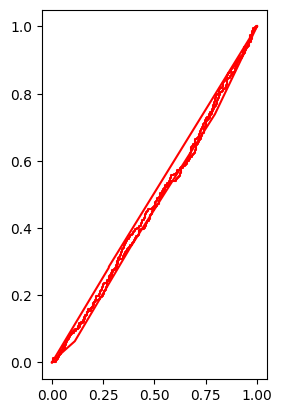

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve,auc,accuracy_score,classification_report, r2_score, roc_auc_score, precision_score, recall_score,confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

lr =LogisticRegression()
dc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
naive  = GaussianNB()
#rf = RandomForestClassifier()
models = [lr, naive, dc, knn]
model_names = ["Logistic regression", "GaussianNB", "Decision Tree", "Knn"]
accuracy_scores_test  = []
accuracy_scores_train  = []
cross_val_scores = []

param_tuning = {
    "Logistic regression":{"class_weight":[None, "balanced"], "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]},
    "GaussianNB":{},
    "Decision Tree":{
      'max_depth': [3, 5, 10, 15, None],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
      'criterion': ['gini', 'entropy']},

    "Knn":{
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
  },

}
# "RandomForestClassifier":{
#     'n_estimators': [50, 100],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt', 'log2'],
#     'bootstrap': [True, False],
#     'class_weight': [None, 'balanced']
#   }

best_models = {}

for i in range(len(models)):

  models[i].fit(x_train_scaled,y_train)
  y_probabi = models[i].predict_proba(x_test_scaled)[:,1]
  y_predict = models[i].predict(x_test_scaled)
  y_predict_train = models[i].predict(x_train_scaled)

  grid = GridSearchCV(models[i], param_tuning[model_names[i]], cv=5, scoring='accuracy', n_jobs=-1)
  grid.fit(x_train_scaled,y_train)

  best_models[models[i]] = grid.best_estimator_
  print(f"Best params for {models[i]}: {grid.best_params_}")

  fpr,tpr,_ = roc_curve(y_test,y_probabi)
  cross_val_scores.append(np.mean(cross_val_score(models[i], x_train_scaled , y_train, cv=10)))
  roc_auc_log = auc(fpr,tpr)
  plt.subplot(121)
  plt.plot(fpr,tpr,c = "r")

  accuracy_scores_train.append(accuracy_score(y_train,y_predict_train))
  accuracy_scores_test.append(accuracy_score(y_test,y_predict))

  print(f"{model_names[i]} : ")
  print(f"AUC score: {roc_auc_score(y_test, y_probabi)}")

  print(confusion_matrix(y_test, y_predict))
  print(f"Precsion Score: {precision_score(y_test, y_predict)}")
  print(f"Recall Score: {recall_score(y_test, y_predict)}")
  print(" \n")

  # print(f"classification report {model_names[i]}: \n",classification_report(y_test,y_predict))

Text(0.5, 1.0, 'Cross validation Mean')

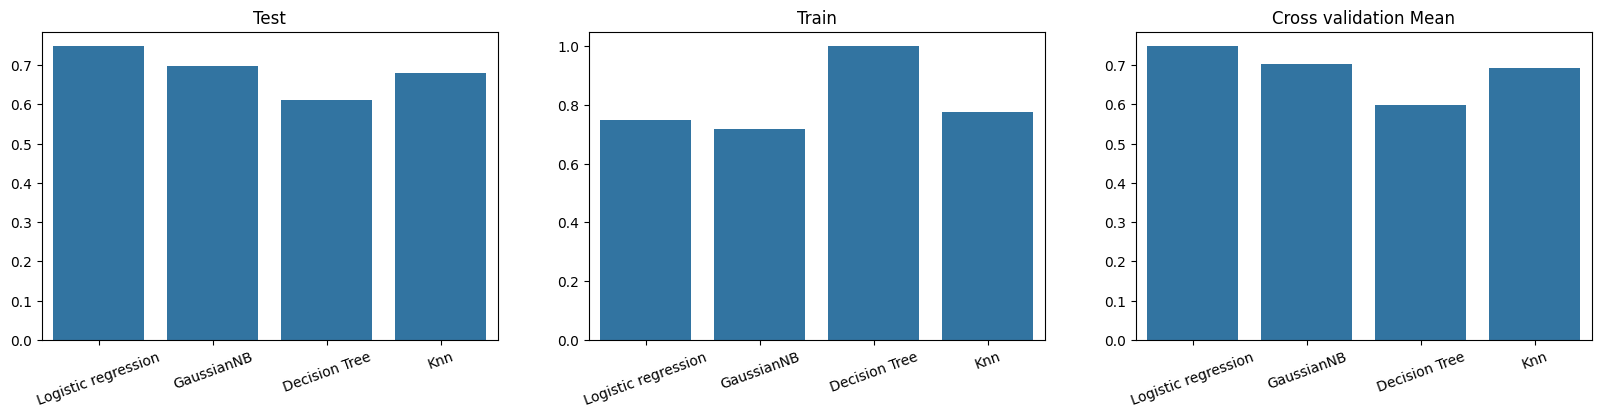

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.barplot(x=model_names, y=accuracy_scores_test)
plt.title("Test")
plt.xticks(rotation=20)
plt.subplot(132)
sns.barplot(x=model_names, y=accuracy_scores_train)
plt.xticks(rotation=20)
plt.title("Train")

plt.subplot(133)
sns.barplot(x=model_names, y=cross_val_scores)
plt.xticks(rotation=20)
plt.title("Cross validation Mean")

In [ ]:
accuracy_scores_train, accuracy_scores_test

([0.7477142857142857, 0.718, 0.9991428571428571, 0.7771428571428571],
 [0.7473333333333333, 0.6973333333333334, 0.6113333333333333, 0.68])

In [ ]:
cross_val_scores

[np.float64(0.7477142857142857),
 np.float64(0.7031428571428572),
 np.float64(0.5982857142857142),
 np.float64(0.6937142857142857)]

In [ ]:
import numpy as np

from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# Create model
model = Sequential([
  Dense(128, activation='relu', input_shape=(22,)),
  # Dense(64, activation='relu'),
  Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train_scaled, y_train, epochs = 200, batch_size=128)

predict = model.predict(x_test_scaled)


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6548 - loss: 0.6337
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7520 - loss: 0.5652
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7428 - loss: 0.5715
Epoch 4/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7451 - loss: 0.5682
Epoch 5/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7453 - loss: 0.5675
Epoch 6/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7443 - loss: 0.5674
Epoch 7/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7481 - loss: 0.5626
Epoch 8/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7455 - loss: 0.5638
Epoch 9/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7461 - loss: 0.5644
Epoch 10/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7473 - loss: 0.5628
Epoch 11/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7415 - loss: 0.5685
Epoch 12/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7448 - lo

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_labels = (predict >= 0.5).astype(int)

confusion_matrix(y_test, y_pred_labels)

array([[1062,   59],
       [ 362,   17]])

In [ ]:
accuracy_score(y_test, y_pred_labels)

0.7193333333333334

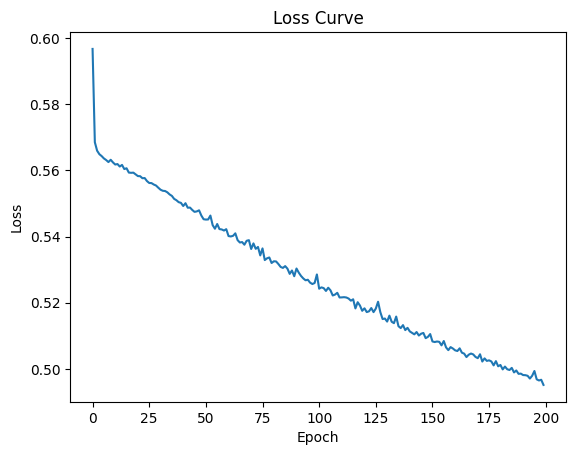

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7188 - loss: 0.6020
Testing Accuracy: 71.93%


In [ ]:
# Plot loss curve
plt.plot(history.history['loss'])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

#Print test error
print(f"Testing Accuracy: {round(model.evaluate(x_test_scaled, y_test)[1] * 100, 2)}%")